In [5]:
# Useful additional packages
import matplotlib.pyplot as plt
import numpy as np
from math import pi

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

In [11]:
import math

In [12]:
def cos_1 (x):
    return math.cos(x)

In [13]:
# Initializing a three-qubit quantum state
desired_vector = [
    cos_1(np.pi/4),
    0,
    cos_1(np.pi/4),
    0,
    0,
    0,
    0,
    0]


q = QuantumRegister(3)

qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0],q[1],q[2]])
qc.draw()

┌──────────────────────────────────────────┐
q0_0: ┤0                                         ├
      │                                          │
q0_1: ┤1 Initialize(0.70711,0,0.70711,0,0,0,0,0) ├
      │                                          │
q0_2: ┤2                                         ├
      └──────────────────────────────────────────┘

In [14]:
backend = BasicAer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state

array([0.70710678+0.j, 0.        +0.j, 0.70710678+0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j])

In [15]:
state_fidelity(desired_vector,qc_state)

1.0

In [17]:
from qiskit.circuit.library import TwoLocal

In [18]:
def training_circuit(parameters):
    
    qc = QuantumCircuit(M)
    qc_descriptor = QuantumCircuit(M)
    
    list_eta = parameters[0:M]
    list_ksi = parameters[M:5*M] ## twolocal have 4M parameters
    
    for i in range(M):
        qc_descriptor.u(math.cos(list_eta[i]),math.cos(list_eta[i]),0,i) #should be replaced to theta, phi   

    twolocal = TwoLocal(num_qubits=M, reps=depth, rotation_blocks=['ry','rz'], 
                   entanglement_blocks='cx', entanglement='circular', parameter_prefix='ξ', insert_barriers=True)
    twolocal.bind_parameters(list_ksi)
    
    qc += qc_descriptor
    qc.barrier()

    qc += twolocal
    qc.barrier()

    #Observable
    qc.z(0)

    qc.barrier()

    qc += twolocal.inverse()
    qc.barrier()

    qc += qc_descriptor.inverse()
    qc.barrier()

    #qc.decompose().draw('mpl')
    
    return qc
    

<ipython-input-18-c834f495ab29>:16: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += qc_descriptor
<ipython-input-18-c834f495ab29>:19: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += twolocal
<ipython-input-18-c834f495ab29>:27: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  qc += twolocal.inverse()
<ipython-input-18-c834f495ab29>:30: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the 

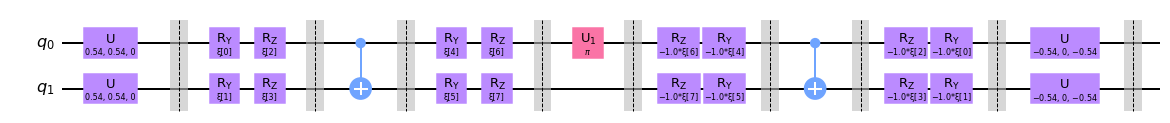

In [26]:
M=2

depth = 1

parameters= np.ones(5*M)#[1,1,1,1,1,1,1,1,1,1]
qc = training_circuit(parameters)
qc.decompose().draw('mpl')

In [56]:
def calculate_loss_function(parameters):

    result = 0
    
    parameters = [parameters[0:3], parameters[3:6], parameters[6:9]]

    for i in range(0, len(gate_set)):
        qctl = QuantumRegister(N)
        qc = ClassicalRegister(N)
        circ = QuantumCircuit(qctl, qc)

        backend = Aer.get_backend('aer_simulator')
    
        circ += training_circuit()
        
        circ.save_statevector()
        t_circ = transpile(circ, backend)
        qobj = assemble(t_circ)
        job = backend.run(qobj)

        result = job.result()
        outputstate = result.get_statevector(circ, decimals=100)
        o = outputstate

        result = np.real(o[0]) ## <0|GdWdOWG|0> is picking first component of GdWdOWG|0>. I don't think square is necessary
    
    return result

In [ ]:
list_theta = [1,2]
list_phi = [1,2]
M = 2
N = 4
depth = 3

out = minimize(calculate_loss_function, x0=[float(random.randint(0,3000))/1000 for i in range(0, 4*M)], method="COBYLA", options={'maxiter':200})
print(out)

out_f = [out['x'][0:3], out['x'][3:6], out['x'][6:9]]
